## Data Analysis and Visualization
In this interactive notebook, we perform some analysis and hypothesis testing to determine if there is any relationship between the quality of the air in four states (Illinois, New York, California, and Georgia) and the rates of respiratory cancers in these states. To start, we will need to import the required libraries that we will use for statistical testing and data manipulations.

In [56]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from pyaqs import AQSFetcher
sns.set(style='darkgrid')
sns.set_context('talk')
analysis_fetcher = AQSFetcher('bbjornstad.flatiron@gmail.com', 'ochrefox21')

Now, we can read in our cleaned data from the [`cleaned_data`](./cleaned_data/) folder. We will fetch both the air quality data as well as the cancer rates in these states, as broken down between counties.

In [57]:
ca_aq_df = pd.read_csv('cleaned_data/ca_aq_data.csv')
il_aq_df = pd.read_csv('cleaned_data/il_aq_data.csv')
ny_aq_df = pd.read_csv('cleaned_data/ny_aq_data.csv')
ga_aq_df = pd.read_csv('cleaned_data/ga_aq_data.csv')

In [58]:
ca_cancer_rates = pd.read_csv('cleaned_data/ca_all_counties_cancer_rates.csv')
il_cancer_rates = pd.read_csv('cleaned_data/il_all_counties_cancer_rates.csv')
ny_cancer_rates = pd.read_csv('cleaned_data/ny_all_counties_cancer_rates.csv')
ga_cancer_rates = pd.read_csv('cleaned_data/ga_all_counties_cancer_rates.csv')

In [59]:
ca_cancer_rates.head()

,Unnamed: 0,County,Year,AgeAdjustedRate,CaseCount,Population
0,0,Mono,2012-2016,25.9,20,70372
1,1,Marin,2012-2016,35.1,680,1299494
2,2,Monterey,2012-2016,36.8,763,2154029
3,3,Los Angeles,2012-2016,36.6,18307,50321257
4,4,Santa Cruz,2012-2016,37.0,538,1357213


As we can see, the import of our data produced an extra unneeded column, which we will quickly remove.

In [60]:
cancer_rates = [ca_cancer_rates, il_cancer_rates, ny_cancer_rates, ga_cancer_rates]
aq_dfs = [ca_aq_df, il_aq_df, ny_aq_df, ga_aq_df]
for i in range(len(cancer_rates)):
    cancer_rates[i].drop(columns=['Unnamed: 0'], inplace=True)
    aq_dfs[i].drop(columns=['Unnamed: 0'], inplace=True)

In [61]:
ca_cancer_rates.head()

,County,Year,AgeAdjustedRate,CaseCount,Population
0,Mono,2012-2016,25.9,20,70372
1,Marin,2012-2016,35.1,680,1299494
2,Monterey,2012-2016,36.8,763,2154029
3,Los Angeles,2012-2016,36.6,18307,50321257
4,Santa Cruz,2012-2016,37.0,538,1357213


Now, we can merge together our associated dataframes along the county name to produce a dataframe suitable for visualization and further hypothesis analysis.

In [62]:
ca_aq_df.head()

,county_code,site_number,parameter_code,parameter,sample_duration,year,units_of_measure,observation_count,exceptional_data_count,null_observation_count,arithmetic_mean,standard_deviation,local_site_name,site_address,state,county,city,date_of_last_change
0,73,1006,44201,Ozone,1 HOUR,2012,Parts per million,8268,0,516,0.057747,0.014912,Alpine,"2300 VICTORIA DR., ALPINE",California,San Diego,Alpine,2018-07-21
1,73,1006,44201,Ozone,8-HR RUN AVG BEGIN HOUR,2012,Parts per million,8582,0,0,0.051136,0.012308,Alpine,"2300 VICTORIA DR., ALPINE",California,San Diego,Alpine,2018-07-21
2,73,1006,44201,Ozone,8-HR RUN AVG BEGIN HOUR,2012,Parts per million,8582,0,0,0.051136,0.012308,Alpine,"2300 VICTORIA DR., ALPINE",California,San Diego,Alpine,2018-07-21
3,73,1006,44201,Ozone,8-HR RUN AVG BEGIN HOUR,2012,Parts per million,6138,0,0,0.050950,0.012460,Alpine,"2300 VICTORIA DR., ALPINE",California,San Diego,Alpine,2018-07-21
4,73,1006,44201,Ozone,1 HOUR,2013,Parts per million,8143,0,617,0.058930,0.013469,Alpine,"2300 VICTORIA DR., ALPINE",California,San Diego,Alpine,2018-07-21


In [63]:
ca_aq_time_means = ca_aq_df.groupby(['county', 'parameter']).mean().reset_index()
ca_aq_time_means.head()

,county,parameter,county_code,site_number,parameter_code,year,observation_count,exceptional_data_count,null_observation_count,arithmetic_mean,standard_deviation
0,Alameda,Carbon monoxide,1.0,10.642857,42101.0,2014.357143,8055.071429,0.000000,119.678571,0.420692,0.229867
1,Alameda,Nitrogen dioxide (NO2),1.0,425.375000,42602.0,2014.208333,7703.416667,0.000000,190.958333,15.562419,8.261447
2,Alameda,Ozone,1.0,615.782609,44201.0,2014.217391,7090.652174,159.184783,49.826087,0.033779,0.010086
3,Alameda,PM2.5 - Local Conditions,1.0,9.684211,88101.0,2014.263158,1815.568421,0.000000,22.389474,8.641273,5.233965
4,Alameda,Sulfur dioxide,1.0,11.000000,42401.0,2014.000000,4623.500000,0.000000,190.600000,1.030929,1.426650


In [64]:
il_aq_time_means = il_aq_df.groupby(['county', 'parameter']).mean().reset_index()
ny_aq_time_means = ny_aq_df.groupby(['county', 'parameter']).mean().reset_index()

In [65]:
ca_merged_df = ca_aq_time_means.join(ca_cancer_rates.set_index('County'), how='inner', on='county')
ca_merged_df.head(10)

,county,parameter,county_code,site_number,parameter_code,year,observation_count,exceptional_data_count,null_observation_count,arithmetic_mean,standard_deviation,Year,AgeAdjustedRate,CaseCount,Population
0,Alameda,Carbon monoxide,1.0,10.642857,42101.0,2014.357143,8055.071429,0.000000,119.678571,0.420692,0.229867,2012-2016,41.5,3416,8041533
1,Alameda,Nitrogen dioxide (NO2),1.0,425.375000,42602.0,2014.208333,7703.416667,0.000000,190.958333,15.562419,8.261447,2012-2016,41.5,3416,8041533
2,Alameda,Ozone,1.0,615.782609,44201.0,2014.217391,7090.652174,159.184783,49.826087,0.033779,0.010086,2012-2016,41.5,3416,8041533
3,Alameda,PM2.5 - Local Conditions,1.0,9.684211,88101.0,2014.263158,1815.568421,0.000000,22.389474,8.641273,5.233965,2012-2016,41.5,3416,8041533
4,Alameda,Sulfur dioxide,1.0,11.000000,42401.0,2014.000000,4623.500000,0.000000,190.600000,1.030929,1.426650,2012-2016,41.5,3416,8041533
5,Amador,Ozone,5.0,2.000000,44201.0,2014.000000,7972.000000,0.000000,80.650000,0.044246,0.014714,2012-2016,59.5,209,185015
6,Butte,Carbon monoxide,7.0,7.000000,42101.0,2013.666667,6681.083333,0.000000,165.666667,0.269892,0.201070,2012-2016,57.8,849,1117709
7,Butte,Nitrogen dioxide (NO2),7.0,7.000000,42602.0,2013.666667,6864.833333,0.000000,307.833333,12.140098,7.067682,2012-2016,57.8,849,1117709
8,Butte,Ozone,7.0,7.000000,44201.0,2013.818182,7315.454545,0.000000,98.159091,0.044148,0.012274,2012-2016,57.8,849,1117709
9,Butte,PM10 Total 0-10um STP,7.0,7.400000,81102.0,2014.100000,2027.000000,0.000000,31.100000,19.720350,12.725369,2012-2016,57.8,849,1117709


In [66]:
ga_aq_time_means = ga_aq_df.groupby(['county', 'parameter']).mean().reset_index()
ga_aq_time_means.head()

,county,parameter,county_code,site_number,parameter_code,year,observation_count,exceptional_data_count,null_observation_count,arithmetic_mean,standard_deviation
0,Bartow,Lead (TSP) LC,15.0,3.000000,14129.0,2012.5,61.50,0.000000,0.000000,0.012932,0.011252
1,Bibb,Ozone,21.0,12.000000,44201.0,2014.0,5375.80,0.000000,26.750000,0.043618,0.011525
2,Bibb,PM10 Total 0-10um STP,21.0,7.000000,81102.0,2012.0,57.00,0.000000,4.000000,20.328197,8.606977
3,Bibb,PM2.5 - Local Conditions,21.0,8.842105,88101.0,2014.0,174.00,0.315789,13.105263,9.677191,4.172899
4,Bibb,Sulfur dioxide,21.0,12.000000,42401.0,2014.0,5086.45,0.000000,96.800000,1.242514,0.917359


In [67]:
ga_merged_df = ga_aq_time_means.join(ga_cancer_rates.set_index('County'), how='inner', on='county')
ga_merged_df.head(10)

,county,parameter,county_code,site_number,parameter_code,year,observation_count,exceptional_data_count,null_observation_count,arithmetic_mean,standard_deviation,Year,AgeAdjustedRate,CaseCount,Population
0,Bartow,Lead (TSP) LC,15.0,3.000000,14129.0,2012.50,61.500,0.000000,0.000000,0.012932,0.011252,2012-2016,79.6,434,508425
1,Bibb,Ozone,21.0,12.000000,44201.0,2014.00,5375.800,0.000000,26.750000,0.043618,0.011525,2012-2016,74.0,661,773420
2,Bibb,PM10 Total 0-10um STP,21.0,7.000000,81102.0,2012.00,57.000,0.000000,4.000000,20.328197,8.606977,2012-2016,74.0,661,773420
3,Bibb,PM2.5 - Local Conditions,21.0,8.842105,88101.0,2014.00,174.000,0.315789,13.105263,9.677191,4.172899,2012-2016,74.0,661,773420
4,Bibb,Sulfur dioxide,21.0,12.000000,42401.0,2014.00,5086.450,0.000000,96.800000,1.242514,0.917359,2012-2016,74.0,661,773420
5,Chatham,Ozone,51.0,21.000000,44201.0,2014.00,5329.200,0.000000,38.600000,0.039020,0.010351,2012-2016,61.8,943,1413533
6,Chatham,PM10 Total 0-10um STP,51.0,14.000000,81102.0,2012.00,56.000,0.000000,4.000000,15.696429,5.176589,2012-2016,61.8,943,1413533
7,Chatham,PM2.5 - Local Conditions,51.0,63.250000,88101.0,2013.25,177.125,0.250000,38.000000,9.252655,4.104157,2012-2016,61.8,943,1413533
8,Chatham,Sulfur dioxide,51.0,511.500000,42401.0,2014.00,5010.250,0.000000,157.650000,3.641670,5.934503,2012-2016,61.8,943,1413533
9,Chattooga,Ozone,55.0,1.000000,44201.0,2014.00,5182.750,0.000000,14.350000,0.042338,0.010392,2012-2016,89.9,147,125251


In [68]:
il_merged_df = il_aq_time_means.join(il_cancer_rates.set_index('County'), how='inner', on='county')
ny_merged_df = ny_aq_time_means.join(ny_cancer_rates.set_index('County'), how='inner', on='county')

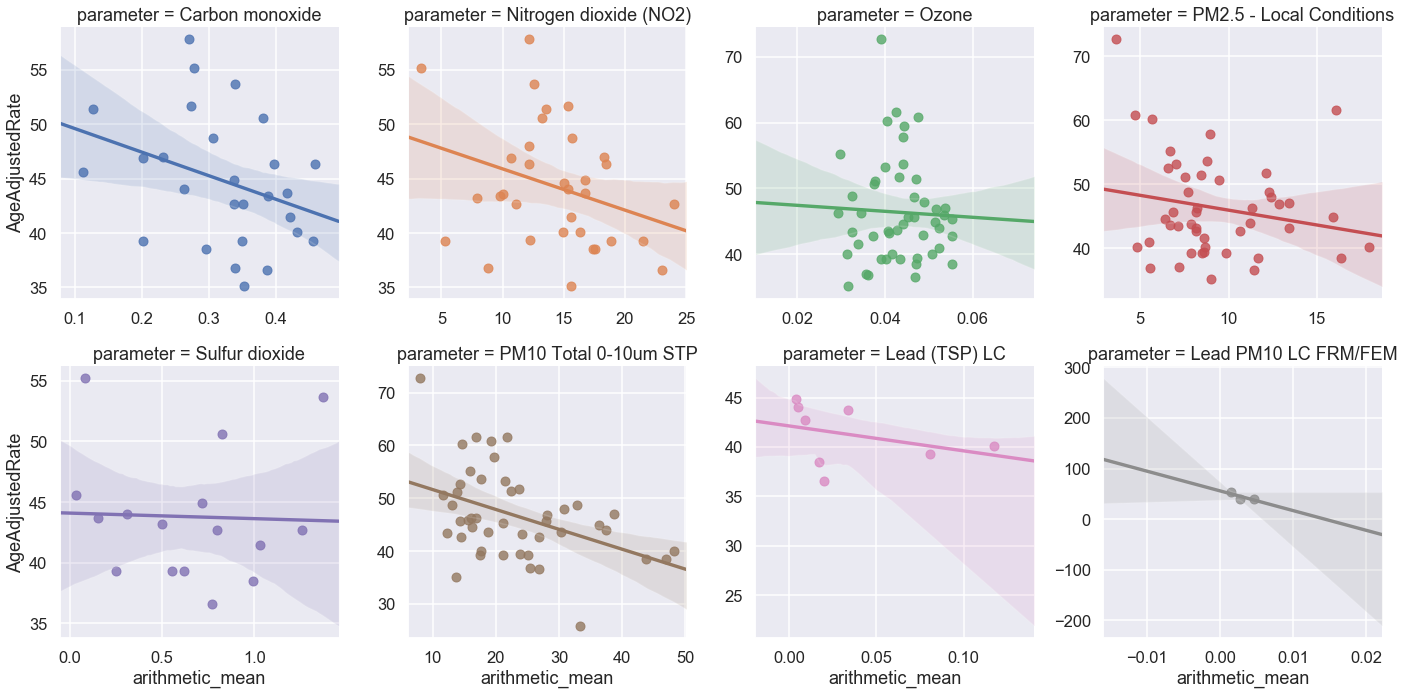

In [69]:
ca_lm = sns.lmplot(
    x='arithmetic_mean',
    y='AgeAdjustedRate', 
    hue='parameter', 
    col='parameter', 
    data=ca_merged_df, 
    col_wrap=4, 
    sharex=False, 
    sharey=False);

ca_lm.savefig('plots/ca_relations_by_param.png')

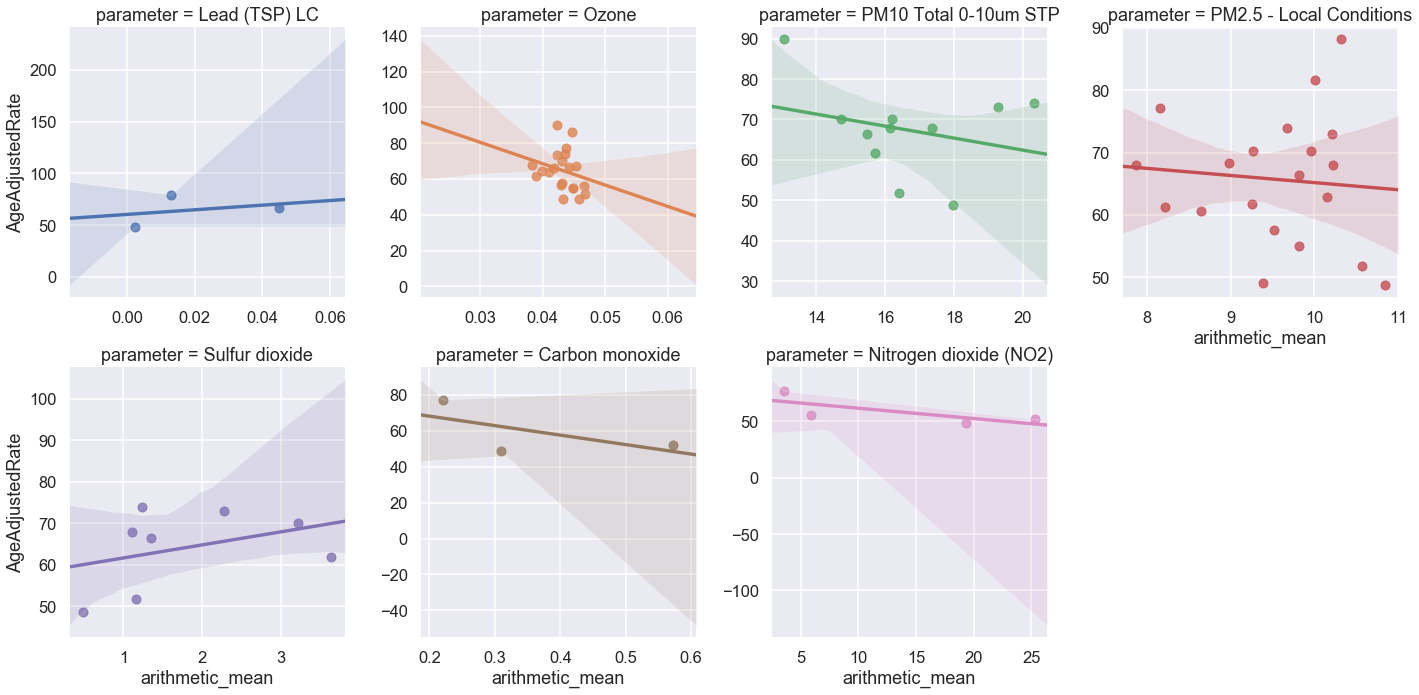

In [70]:
ga_lm = sns.lmplot(
    x='arithmetic_mean',
    y='AgeAdjustedRate', 
    hue='parameter', 
    col='parameter', 
    data=ga_merged_df, 
    col_wrap=4, 
    sharex=False, 
    sharey=False);

ga_lm.savefig('plots/ga_relations_by_param.png')

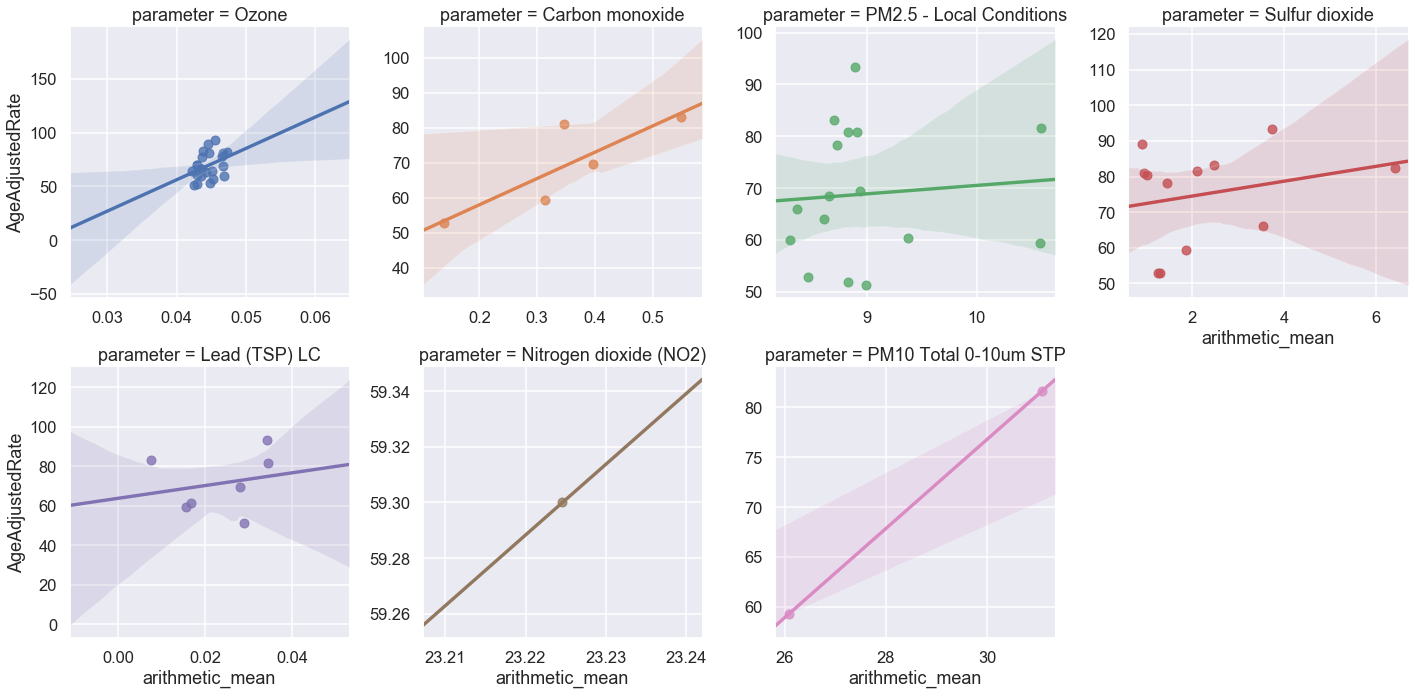

In [71]:
il_lm = sns.lmplot(
    x='arithmetic_mean',
    y='AgeAdjustedRate', 
    hue='parameter', 
    col='parameter', 
    data=il_merged_df, 
    col_wrap=4, 
    sharex=False, 
    sharey=False);

il_lm.savefig('plots/il_relations_by_param.png')

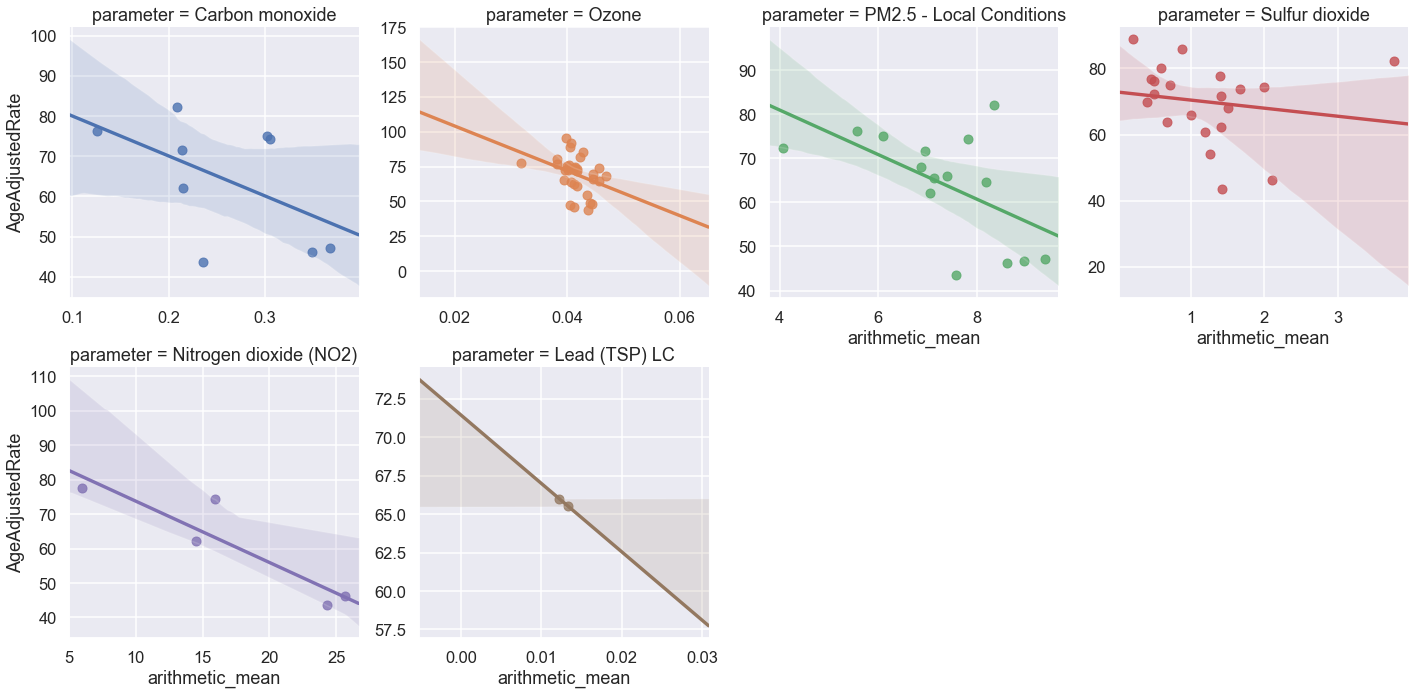

In [72]:
ny_lm = sns.lmplot(
    x='arithmetic_mean',
    y='AgeAdjustedRate', 
    hue='parameter', 
    col='parameter', 
    data=ny_merged_df, 
    col_wrap=4, 
    sharex=False, 
    sharey=False);

ny_lm.savefig('plots/ny_relations_by_param.png')

The biggest takeaway from these plots is an indication in a lack of data points to be able to draw any strong conclusions. In particular, the selection of only four states seems to be too restrictive to be able to generate a sizeable enough data set.

## Hypothesis Testing
For each of the four selected states, we are interested in seeing if there is any relationship between the levels of pollutants in the air and the rates of lung cancer in this area. This is best achieved through iteration over each parameter, and performing a T-Test for each state and pollutant.

In [81]:
criteria_params = analysis_fetcher.get_parameter_list_by_class('CRITERIA')

In [82]:
test_results = {}

for p in criteria_params.parameter_description:
    ca_subset = ca_merged_df.loc[ca_merged_df.parameter == p]
    ny_subset = ny_merged_df.loc[ny_merged_df.parameter == p]
    il_subset = il_merged_df.loc[il_merged_df.parameter == p]
    ga_subset = ga_merged_df.loc[ga_merged_df.parameter == p]
    
    ca_test = stats.ttest_ind(ca_subset.AgeAdjustedRate, ca_subset.arithmetic_mean, equal_var=False)
    ny_test = stats.ttest_ind(ny_subset.AgeAdjustedRate, ny_subset.arithmetic_mean, equal_var=False)
    il_test = stats.ttest_ind(il_subset.AgeAdjustedRate, il_subset.arithmetic_mean, equal_var=False)
    ga_test = stats.ttest_ind(ga_subset.AgeAdjustedRate, ga_subset.arithmetic_mean, equal_var=False)
    
    ca_res = ('CA', ca_test.statistic, ca_test.pvalue)
    ny_res = ('NY', ny_test.statistic, ny_test.pvalue)
    il_res = ('IL', il_test.statistic, il_test.pvalue)
    ga_res = ('GA', ga_test.statistic, ga_test.pvalue)
    
    test_results[p] = [ca_res, ny_res, il_res, ga_res]
    
test_results

//anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'Lead (TSP) LC': [('CA', 38.739162240982914, 1.9762832675527944e-09),
  ('NY', 262.94820112504095, 0.002420940676261182),
  ('IL', 12.453900605857976, 1.6374870509197173e-05),
  ('GA', 7.24790167974256, 0.018508917687700917)],
 'Carbon monoxide': [('CA', 38.99788907586873, 1.3092822267646475e-24),
  ('NY', 12.865668312242088, 1.258125039947593e-06),
  ('IL', 11.64765628787922, 0.0003101300343200643),
  ('GA', 6.520059940860414, 0.022708783763355885)],
 'Sulfur dioxide': [('CA', 32.246445567215254, 2.1385547010669115e-15),
  ('NY', 26.617700216413212, 3.3994413035722016e-17),
  ('IL', 18.18189916517822, 1.0059145479210984e-09),
  ('GA', 18.505863516697936, 2.4804172545619294e-07)],
 'Nitrogen dioxide (NO2)': [('CA', 23.748311725393506, 1.0294286605397326e-32),
  ('NY', 5.537963055025423, 0.0014957146044672844),
  ('IL', nan, nan),
  ('GA', 5.405375090649204, 0.0018808033692712983)],
 'Ozone': [('CA', 41.726079246308025, 2.246129775721289e-39),
  ('NY', 28.74726063706955, 2.155967759346

## Further Hypothesis Testing
Unfortunately, the above results don't seem to hold much significance or meaning. This is likely due to the small sampling sizes that we are currently using, so let's try aggregating all of the data points throughout these four states to see if we can determine any more significant conclusions. We will start by concatenating our dataframes together, then producing the same grid of correlation plots as before.

In [157]:
all_dfs_merged = pd.concat([ca_merged_df, ny_merged_df, il_merged_df, ga_merged_df])

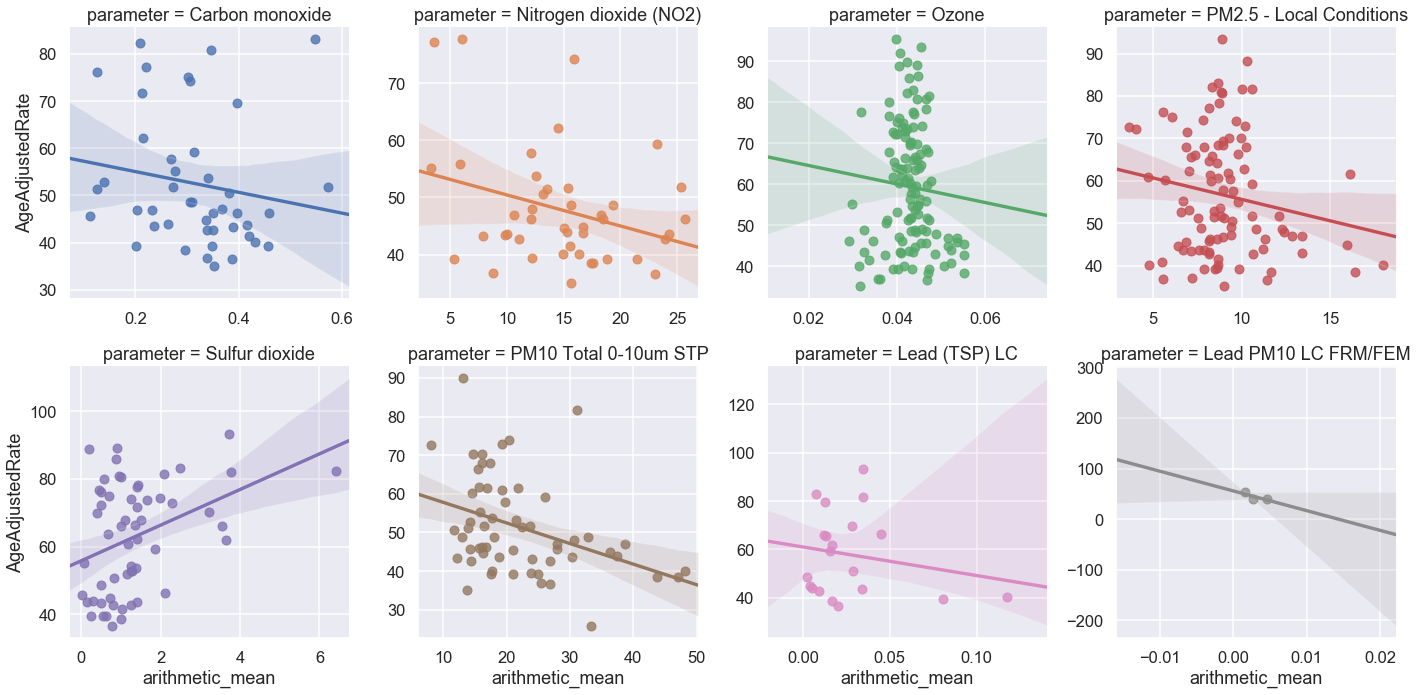

In [158]:
all_lm = sns.lmplot(
    x='arithmetic_mean',
    y='AgeAdjustedRate', 
    hue='parameter', 
    col='parameter', 
    data=all_dfs_merged, 
    col_wrap=4, 
    sharex=False, 
    sharey=False);

all_lm.savefig('plots/summative_relations_by_param.png')

Once again, these plots do seem to indicate a sample size which is a bit too small to fully identify any significant trends or conclusions. We can perform a T-Test in the same style as before to determine if there is a correlation or not. In this case, to better identify if the effect of air pollutant levels has an impact, we have segmented the data into three separate groups, according to the possible range of values of air quality measurements. Then, an independent Welch's T-Test is performed pairwise between the three groups for each parameter. The results are shown below.

In [159]:
actual_test_results = {}

for p in criteria_params.parameter_description:
    subset = all_dfs_merged.loc[all_dfs_merged.parameter == p]
    smax = subset.arithmetic_mean.max()
    smin = subset.arithmetic_mean.min()
    value_range = smax - smin
    l_thresh, h_thresh = smin+value_range*(1/3), smin+value_range*(2/3)
    
    l_samp = subset.loc[subset.arithmetic_mean < l_thresh]
    m_samp = subset.loc[(subset.arithmetic_mean >= l_thresh) & (subset.arithmetic_mean <= h_thresh)]
    h_samp = subset.loc[subset.arithmetic_mean > h_thresh]
    
    lh_test = stats.ttest_ind(l_samp.AgeAdjustedRate, h_samp.AgeAdjustedRate, equal_var=False)
    lm_test = stats.ttest_ind(l_samp.AgeAdjustedRate, m_samp.AgeAdjustedRate, equal_var=False)
    mh_test = stats.ttest_ind(m_samp.AgeAdjustedRate, h_samp.AgeAdjustedRate, equal_var=False)
    
    results = {'Low-High': (lh_test.statistic, lh_test.pvalue), 'Low-Mid': (lm_test.statistic, lm_test.pvalue), 'Mid-High': (mh_test.statistic, mh_test.pvalue)}
    actual_test_results[p] = results
    
actual_test_results

{'Lead (TSP) LC': {'Low-High': (4.614244091206346, 0.0002758325856375234),
  'Low-Mid': (nan, nan),
  'Mid-High': (nan, nan)},
 'Carbon monoxide': {'Low-High': (0.8227582252238692, 0.4321622161955514),
  'Low-Mid': (1.2698678803114074, 0.21801434769151343),
  'Mid-High': (0.05527410719795369, 0.9575978265029312)},
 'Sulfur dioxide': {'Low-High': (nan, nan),
  'Low-Mid': (-3.162226754250022, 0.01018553495961334),
  'Mid-High': (nan, nan)},
 'Nitrogen dioxide (NO2)': {'Low-High': (1.265199305923144,
   0.22974886912616052),
  'Low-Mid': (0.9400817681363837, 0.36545519518468406),
  'Mid-High': (0.6029033199503743, 0.5516001412591425)},
 'Ozone': {'Low-High': (-1.0853573092594115, 0.28616215499369074),
  'Low-Mid': (-5.35702269847527, 2.412199938423605e-05),
  'Mid-High': (4.497960932857548, 4.9856097108102557e-05)},
 'PM10 Total 0-10um STP': {'Low-High': (4.9263384015691,
   3.044634793404465e-05),
  'Low-Mid': (2.099439189572581, 0.042825894221784296),
  'Mid-High': (1.6787761212121948, 

Once again, these results indicate that perhaps we are lacking in enough data to be able to fully draw any significant conclusions.

## All The Data!
In order to remedy this issue, we decided to tackle the challenge of aggregating data over all 50 states. This requires two additional steps of AQS API interaction and data cleaning, one for each of the CDC cancer data and the other for the Air Quality System data. The interactive notebooks holding the fetching and cleaning of the data are stored at [county_data_cleaning_2.ipynb](county_data_cleaning_2.ipynb) and [aqs_data_fetching_2.ipynb](aqs_data_fetching_2.ipynb), respectively. For now, we will simply import the already cleaned dataframes from the [`cleaned_data`](./cleaned_data/) folder.

In [149]:
all_states_cancer_rates = pd.read_csv('cleaned_data/all_states_lung_cancer_means.csv', index_col=0)
all_states_aq = pd.read_csv('cleaned_data/all_states_aq.csv', index_col=0)

In [150]:
all_states_cancer_rates.head()

,state,area,age_adjusted_rate,count,population,crude_rate
0,AK,Anchorage,57.030769,185.230769,451234.461538,39.853846
1,AK,Bethel,53.750000,25.000000,82972.000000,30.300000
2,AK,Fairbanks North Star,52.914286,98.571429,264969.285714,37.971429
3,AK,Juneau,43.183333,36.000000,94517.333333,38.066667
4,AK,Kenai,71.814286,113.000000,158237.714286,76.342857


In [151]:
all_states_aq.head()

,state,county,parameter,county_code,site_number,parameter_code,year,observation_count,exceptional_data_count,null_observation_count,arithmetic_mean,standard_deviation
0,AL,Baldwin,Ozone,3.0,10.0,44201.0,2014.0,5176.85,0.0,120.2,0.041641,0.012011
1,AL,Baldwin,PM2.5 - Local Conditions,3.0,10.0,88101.0,2014.0,116.80,0.0,5.2,8.469895,3.431420
2,AL,Clay,PM2.5 - Local Conditions,27.0,1.0,88101.0,2014.0,116.20,0.0,6.2,8.291026,3.646928
3,AL,Colbert,Ozone,33.0,1002.0,44201.0,2014.0,5335.70,0.0,76.6,0.041135,0.010685
4,AL,Colbert,PM2.5 - Local Conditions,33.0,1002.0,88101.0,2014.0,118.60,0.0,3.4,8.589856,3.836046


Now, we can easily merge along the state and county/area fields to produce a clean dataframe containing counties, air quality readings for EPA criteria parameters if available, and rates of lung cancer incidence. We can easily use this to then perform some analysis and visualization using data from all 50 states.

In [160]:
merged_state_df = all_states_aq.join(
    all_states_cancer_rates.set_index(['state', 'area']),
    on=['state', 'county'],
    how='inner')

In [161]:
merged_state_df

,state,county,parameter,county_code,site_number,parameter_code,year,observation_count,exceptional_data_count,null_observation_count,arithmetic_mean,standard_deviation,age_adjusted_rate,count,population,crude_rate
0,AL,Baldwin,Ozone,3.0,10.000000,44201.0,2014.000000,5176.850000,0.0,120.200000,0.041641,0.012011,68.511111,438.888889,437519.555556,86.577778
1,AL,Baldwin,PM2.5 - Local Conditions,3.0,10.000000,88101.0,2014.000000,116.800000,0.0,5.200000,8.469895,3.431420,68.511111,438.888889,437519.555556,86.577778
2,AL,Clay,PM2.5 - Local Conditions,27.0,1.000000,88101.0,2014.000000,116.200000,0.0,6.200000,8.291026,3.646928,83.816667,51.333333,41172.666667,125.116667
3,AL,Colbert,Ozone,33.0,1002.000000,44201.0,2014.000000,5335.700000,0.0,76.600000,0.041135,0.010685,64.971429,140.714286,148092.714286,91.214286
4,AL,Colbert,PM2.5 - Local Conditions,33.0,1002.000000,88101.0,2014.000000,118.600000,0.0,3.400000,8.589856,3.836046,64.971429,140.714286,148092.714286,91.214286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,WY,Weston,Nitrogen dioxide (NO2),45.0,4.000000,42602.0,2015.500000,5192.000000,0.0,508.000000,7.813483,4.564964,44.900000,23.500000,35083.000000,67.000000
2917,WY,Weston,Ozone,45.0,3.333333,44201.0,2014.833333,6889.625000,0.0,123.000000,0.047853,0.007953,44.900000,23.500000,35083.000000,67.000000
2918,WY,Weston,PM10 Total 0-10um STP,45.0,4.000000,81102.0,2015.500000,2651.250000,0.0,304.250000,12.933850,10.232004,44.900000,23.500000,35083.000000,67.000000
2919,WY,Weston,PM2.5 - Local Conditions,45.0,4.000000,88101.0,2015.500000,1174.800000,0.0,130.400000,4.526355,4.163538,44.900000,23.500000,35083.000000,67.000000


Let's make another correlation plot by parameter, looking for a relation between the mean air quality readings and the cancer incidence rates in each county.

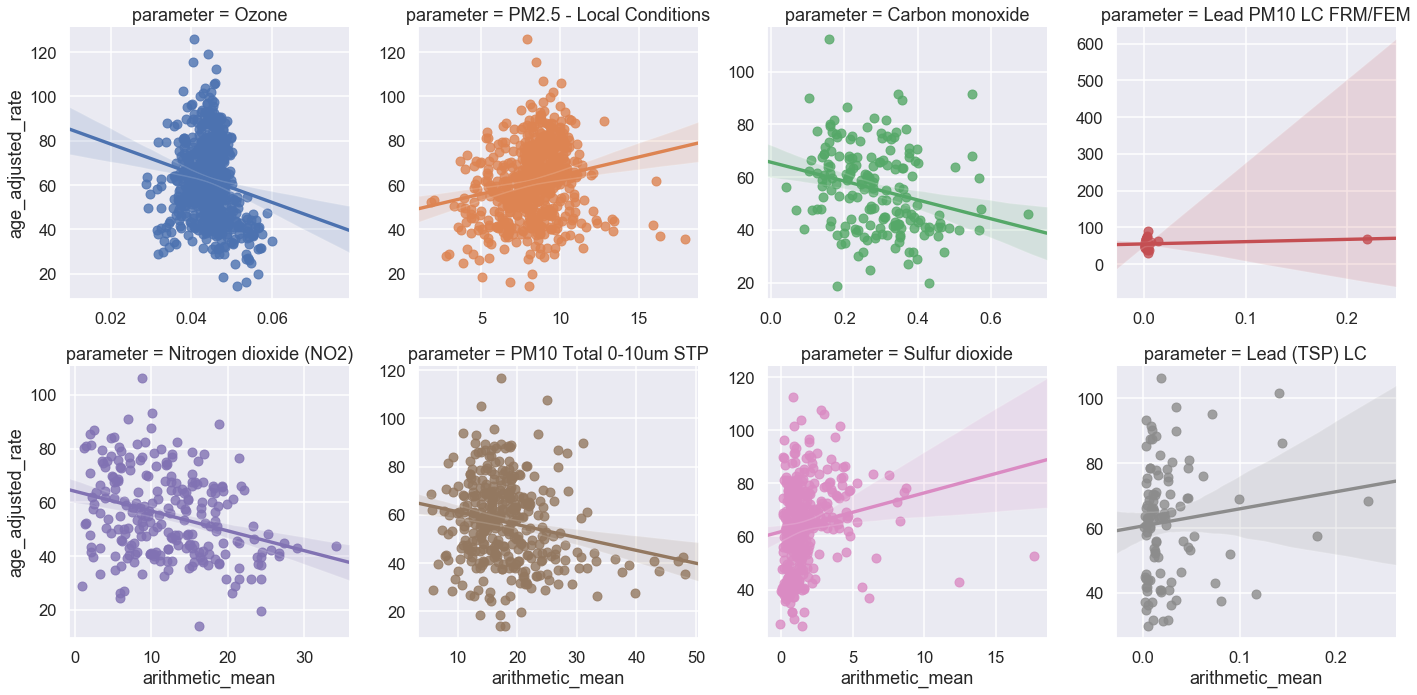

In [162]:
all_states_lm = sns.lmplot(
    x='arithmetic_mean',
    y='age_adjusted_rate', 
    hue='parameter', 
    col='parameter', 
    data=merged_state_df, 
    col_wrap=4, 
    sharex=False, 
    sharey=False);

all_states_lm.savefig('plots/all_states_correlation_by_param.png')

Now, we can similarly perform hypothesis testing using these datasets. As in the previous aggregation of data, we have decided to segment each sample by the range of possible values represented in the mean air quality readings. Firstly, we have decided to segment into thirds, as before. However, we have also chosen to segment along the halfway mark of the air quality readings averages. The test results are summarized below.

In [163]:
all_states_test_results = {}

for p in criteria_params.parameter_description:
    subset = merged_state_df.loc[merged_state_df.parameter == p]
    smax = subset.arithmetic_mean.max()
    smin = subset.arithmetic_mean.min()
    value_range = smax - smin
    l_thresh, h_thresh = smin+value_range*(1/3), smin+value_range*(2/3)
    
    l_samp = subset.loc[subset.arithmetic_mean < l_thresh]
    m_samp = subset.loc[(subset.arithmetic_mean >= l_thresh) & (subset.arithmetic_mean <= h_thresh)]
    h_samp = subset.loc[subset.arithmetic_mean > h_thresh]
    
    lh_test = stats.ttest_ind(l_samp.age_adjusted_rate, h_samp.age_adjusted_rate, equal_var=False)
    lm_test = stats.ttest_ind(l_samp.age_adjusted_rate, m_samp.age_adjusted_rate, equal_var=False)
    mh_test = stats.ttest_ind(m_samp.age_adjusted_rate, h_samp.age_adjusted_rate, equal_var=False)
    
    results = {
        'Low-High': (lh_test.statistic, lh_test.pvalue), 
        'Low-Mid': (lm_test.statistic, lm_test.pvalue), 
        'Mid-High': (mh_test.statistic, mh_test.pvalue)}
    all_states_test_results[p] = results
    
all_states_test_results

{'Lead (TSP) LC': {'Low-High': (-0.17518271518254813, 0.8854496753885147),
  'Low-Mid': (-0.2200275436468612, 0.8341078723244394),
  'Mid-High': (0.11458013315374688, 0.9125602272107256)},
 'Carbon monoxide': {'Low-High': (0.6670934227806617, 0.5204465133202668),
  'Low-Mid': (2.8920399107151247, 0.0043471480495860205),
  'Mid-High': (-0.47119076981716135, 0.6484680974592096)},
 'Sulfur dioxide': {'Low-High': (3.4014771879432906, 0.16808966520480098),
  'Low-Mid': (-0.7063449847438592, 0.5017464488330052),
  'Mid-High': (2.7495986038678515, 0.043137867720528925)},
 'Nitrogen dioxide (NO2)': {'Low-High': (7.788312038469205,
   1.4495682450428766e-09),
  'Low-Mid': (2.5516912161466285, 0.011396441455208234),
  'Mid-High': (5.61955358337882, 1.9403586772583052e-06)},
 'Ozone': {'Low-High': (7.707525916330818, 1.5449138509149328e-12),
  'Low-Mid': (-3.405759576434415, 0.0008964811021152538),
  'Mid-High': (13.814489843825768, 1.238306152633034e-23)},
 'PM10 Total 0-10um STP': {'Low-High': 

In [164]:
all_states_test_results = {}

for p in criteria_params.parameter_description:
    subset = merged_state_df.loc[merged_state_df.parameter == p]
    smax = subset.arithmetic_mean.max()
    smin = subset.arithmetic_mean.min()
    value_range = smax - smin
    thresh = smin+value_range*(1/2)
    
    l_samp = subset.loc[subset.arithmetic_mean < thresh]
    h_samp = subset.loc[subset.arithmetic_mean >= thresh]
    
    lh_test = stats.ttest_ind(l_samp.age_adjusted_rate, h_samp.age_adjusted_rate, equal_var=False)
    
    results = { 'Low-High': (lh_test.statistic, lh_test.pvalue) } 
    all_states_test_results[p] = results
    
all_states_test_results

{'Lead (TSP) LC': {'Low-High': (-0.8206060062355344, 0.4558362697860585)},
 'Carbon monoxide': {'Low-High': (3.4699415924160033, 0.0009867156734834851)},
 'Sulfur dioxide': {'Low-High': (3.4242902025425086, 0.16729787485207917)},
 'Nitrogen dioxide (NO2)': {'Low-High': (3.6908946954078936,
   0.0004015385145415905)},
 'Ozone': {'Low-High': (2.8548876845404707, 0.004427475730082818)},
 'PM10 Total 0-10um STP': {'Low-High': (3.425286941956987,
   0.0016968499647224188)},
 'Lead PM10 LC FRM/FEM': {'Low-High': (nan, nan)},
 'PM2.5 - Local Conditions': {'Low-High': (-1.5920533204335785,
   0.1138041116781104)}}

In general, these results after aggregation of data over all 50 states indicate that lung cancer is a very complicated illness with many different risk factors and triggering events. Moreover, air is a very fluid compound that has a tendency to spread out rapidly, dispersing over a region of many counties, perhaps. Both of these have an effect of normalizing the data somewhat, which makes it difficult to fully identify any correlations between these groups.

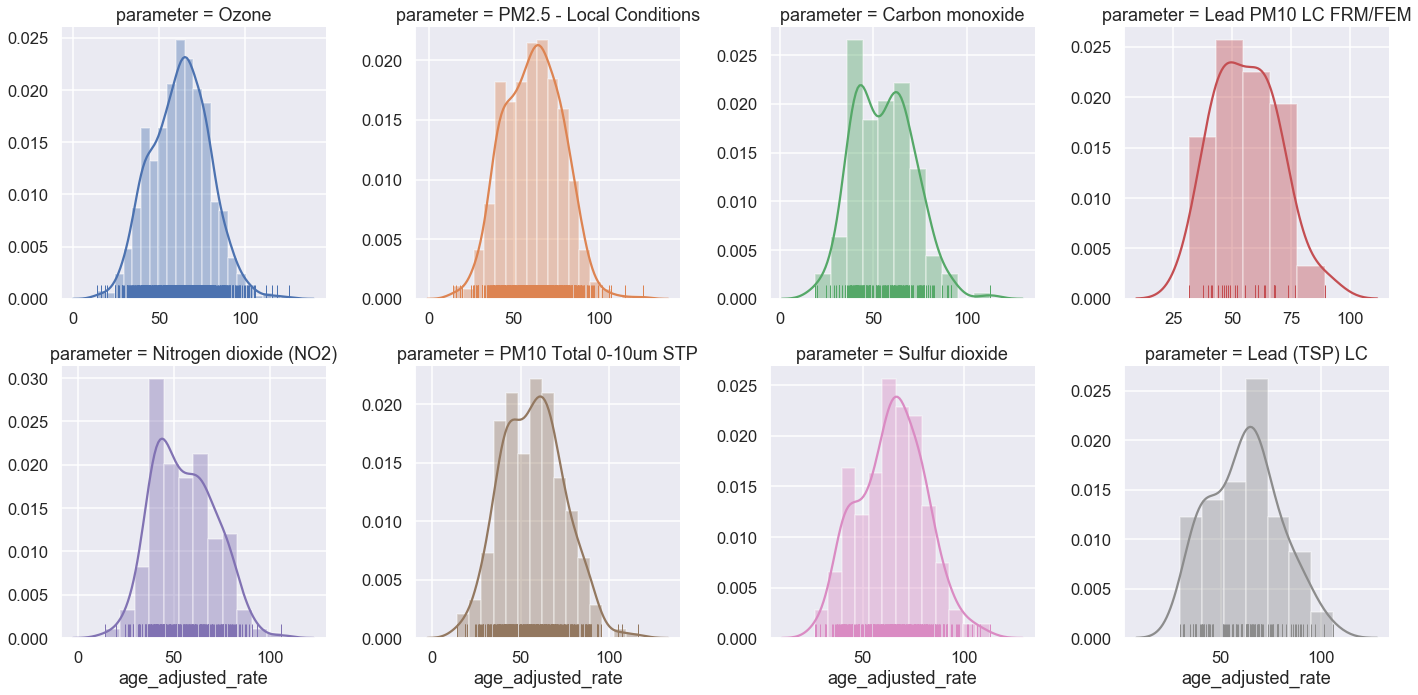

In [184]:
cancer_grid = sns.FacetGrid(
    data = merged_state_df,
    col='parameter',
    col_wrap=4,
    sharex=False,
    sharey=False,
    hue='parameter',
    aspect=1,
    margin_titles=True,
    height=5)
cancer_grid.map(sns.distplot, 'age_adjusted_rate', norm_hist=True, rug=True)
plt.tight_layout()

cancer_grid.savefig('plots/cancer_rate_distributions_by_param.png')

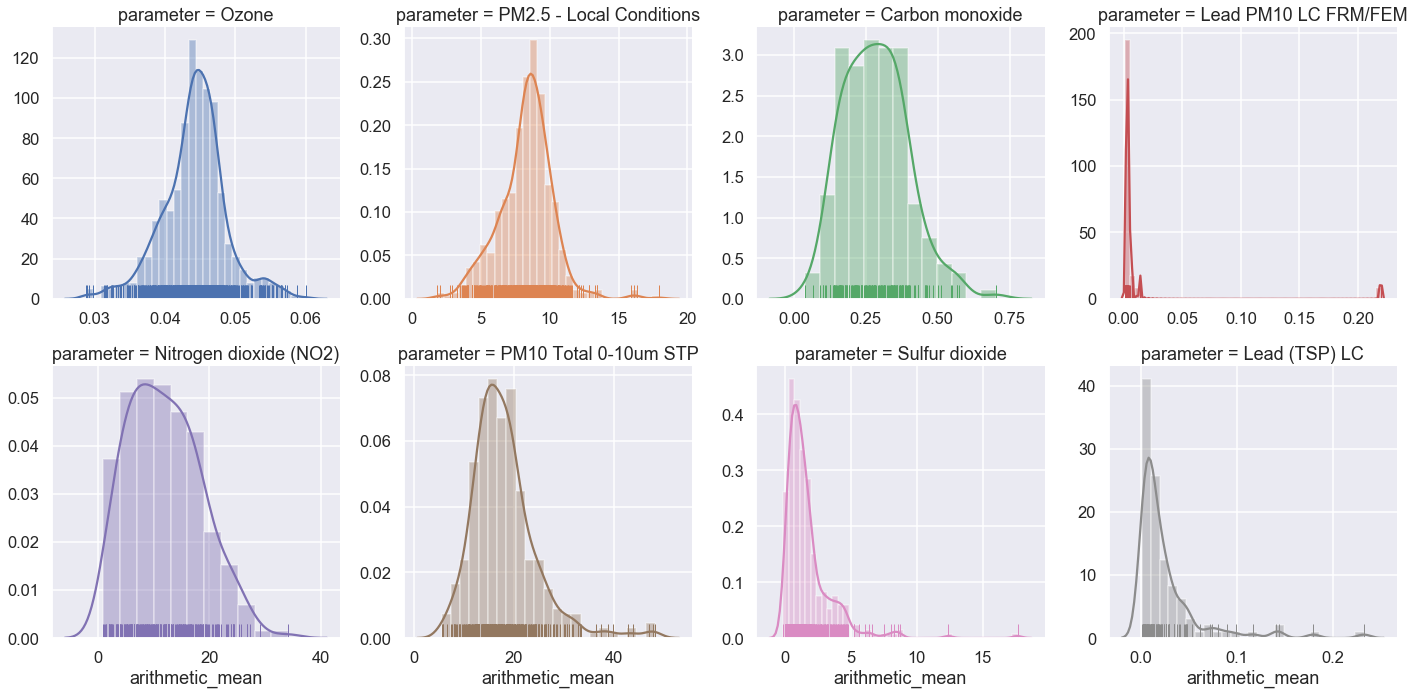

In [185]:
aq_grid = sns.FacetGrid(
    data = merged_state_df,
    col='parameter',
    col_wrap=4,
    sharex=False,
    sharey=False,
    hue='parameter',
    aspect=1,
    margin_titles=True,
    height=5)
aq_grid.map(sns.distplot, 'arithmetic_mean', norm_hist=True, rug=True)
plt.tight_layout()

aq_grid.savefig('plots/air_quality_distributions_by_param.png')